<a href="https://colab.research.google.com/github/LakshmiMedapati96/DM-Kaggle_Text_Classification/blob/main/Movie_Review_NBC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries and Loading the dataset**

In [24]:
# The "encoding='latin-1'" in the below line of code were taken from Reference [1].

import pandas as pd
import re
from sklearn.model_selection import train_test_split
from collections import defaultdict
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("rt_reviews.csv", encoding='latin-1')
data.head()

Freshness                                             Review
0     fresh   Manakamana doesn't answer any questions, yet ...
1     fresh   Wilfully offensive and powered by a chest-thu...
2    rotten   It would be difficult to imagine material mor...
3    rotten   Despite the gusto its star brings to the role...
4    rotten   If there was a good idea at the core of this ...

**Data Cleaning**

In [25]:
# All the lines of code in this cell were taken from Reference [3].

# Define function for removing square brackets and special characters
def remove_square_brackets_special_characters(text):
    text = re.sub('\[[^]]*\]','', text)
    text = re.sub(r'[^a-zA-z0-9\s]','',text)
    return text

# Apply function on review column
data['Review'] = data['Review'].apply(remove_square_brackets_special_characters)

# data.head()
data.shape

(480000, 2)

**Dividing the dataset into Train, Development and Test sets (60:20:20)**

In [26]:
# All the lines of code in this cell were written by me by referring to Reference [2].

# Split the data into training and remaining datasets
trainset, remset = train_test_split(data, train_size = 0.6)

# Split the remaining dataset into development and test datasets
devset, testset = train_test_split(remset, train_size = 0.5)

trainset.shape, devset.shape, testset.shape

((288000, 2), (96000, 2), (96000, 2))

**Build vocabulary as dictionary**

In [27]:
# All the lines of code in this cell were written by me.

# Defining a function to build vocabulary as dictionary and 
# omitting rare words (if the occurrence is less than five times)
def build_vocab_dict(dataset, flag=False):
    vocab_dict = {}
    for review in dataset["Review"]:
        review = review.split(" ")
        # print(review)
        for word in review:
            word = word.lower()
            if word in vocab_dict:
                vocab_dict[word] += 1
            else:
                vocab_dict[word] = 1
    vocab_dict.pop('')                                     # for removing '' in the dictionary
    if flag:
        return vocab_dict
    total_vocab_dict = {k: v for k, v in vocab_dict.items() if v >= 5}
#print(str(total_word_dict)[:1000] + "...........")
    return total_vocab_dict

**Total words dictionary - Entire dataset and Training data**

In [28]:
# All the lines of code in this cell were written by me.

total_word_dict = build_vocab_dict(data)                        # dictionary for entire dataset

total_word_dict_train = build_vocab_dict(trainset)              # dictionary for training dataset
print(f"Total words in the dictionary (train set): {total_word_dict_train}")

Total words in the dictionary (train set): {'the': 326363, 'script': 4281, 'is': 113983, 'condescending': 118, 'to': 136333, 'its': 77631, 'characters': 8781, 'point': 2731, 'that': 75152, 'poor': 674, 'jennifer': 297, 'coolidge': 8, 'should': 5311, 'file': 25, 'abuse': 223, 'charges': 41, 'spielberg': 404, 'works': 2349, 'in': 85737, 'some': 11102, 'hefty': 41, 'homages': 30, 'gone': 1005, 'with': 52856, 'wind': 298, 'searchers': 17, 'and': 189007, 'paths': 60, 'of': 185204, 'glory': 361, 'may': 6759, 'draw': 284, 'a': 224441, 'few': 4000, 'impressed': 128, 'gasps': 21, 'or': 15942, 'couple': 1085, 'eye': 996, 'rolls': 90, 'pugh': 15, 'remarkable': 847, 'exuding': 11, 'sensuality': 35, 'determination': 156, 'venom': 95, 'film': 42574, 'for': 48245, 'our': 3378, 'time': 9702, 'frank': 368, 'capra': 43, 'tradition': 315, 'movie': 33130, 'serves': 588, 'as': 55621, 'showcase': 402, 'bridges': 162, 'through': 5909, 'his': 19132, 'body': 733, 'language': 514, 'demeanor': 43, 'you': 26700, 

**Calculating prior probabilities**

In [29]:
# All the lines of code in this cell were written by me.

# Creating separate dataframes for fresh and rotten datasets
fresh_df = trainset[trainset["Freshness"] == 'fresh']
rotten_df = trainset[trainset["Freshness"] == 'rotten']
#print(fresh_df)
#print(rotten_df)

# Probabilities for fresh and rotten classes
prob_fresh = fresh_df.shape[0]  / (fresh_df.shape[0] + rotten_df.shape[0])
prob_rotten = rotten_df.shape[0]  / (fresh_df.shape[0] + rotten_df.shape[0])

print(f"P(rotten) = {str(prob_rotten)}")
print(f"P(fresh) = {str(prob_fresh)}")

P(rotten) = 0.49988194444444445
P(fresh) = 0.5001180555555556


**Creating separate word dictionaries for fresh and rotten classes**

In [30]:
# All the lines of code in this cell were written by me.

# fresh word dictionary
fresh_word_dict_train = build_vocab_dict(fresh_df)
print(f"Words dictionary for fresh label: {fresh_word_dict_train}")

# rotten word dictionary
rotten_word_dict_train = build_vocab_dict(rotten_df)
print(f"Words dictionary for rotten label: {rotten_word_dict_train}")

Words dictionary for fresh label: {'pugh': 15, 'is': 59743, 'remarkable': 687, 'exuding': 6, 'sensuality': 29, 'determination': 115, 'and': 106701, 'venom': 22, 'a': 118024, 'film': 23400, 'for': 23785, 'our': 2234, 'time': 4755, 'in': 44684, 'the': 164306, 'frank': 238, 'capra': 25, 'tradition': 224, 'movie': 14328, 'serves': 361, 'as': 28011, 'showcase': 270, 'bridges': 125, 'through': 2917, 'his': 10765, 'body': 354, 'language': 324, 'demeanor': 26, 'you': 13868, 'can': 5402, 'imagine': 345, 'toll': 66, 'years': 2301, 'of': 98810, 'wear': 78, 'tear': 85, 'have': 7677, 'inflicted': 22, 'it': 36365, 'imbues': 45, 'pessimistic': 32, 'view': 428, 'seemingly': 273, 'bottomless': 17, 'depths': 107, 'human': 1802, 'cruelty': 117, 'with': 29086, 'sorrowful': 23, 'tragic': 344, 'force': 531, 'somehow': 399, 'maintains': 134, 'buoyant': 67, 'humanistic': 54, 'tone': 782, 'throughout': 609, 'parade': 45, 'lonely': 121, 'humiliations': 5, 'its': 39596, 'an': 20732, 'endearing': 339, 'little': 3

**Calculating probability of the occurrence**

In [31]:
# All the lines of code in this cell were written by me.

# Calculating probability of all the words
total_num_of_words_train = sum(list(total_word_dict_train.values()))

for key, value in total_word_dict_train.items():
    total_word_dict_train[key] = (value, value*100/total_num_of_words_train)
print(f"Probability of the occurence: {str(total_word_dict_train)}")

Probability of the occurence: {'the': (326363, 5.359431336653142), 'script': (4281, 0.07030124601199308), 'is': (113983, 1.8717932548902145), 'condescending': (118, 0.001937759175289695), 'to': (136333, 2.2388179800404235), 'its': (77631, 1.274832055397579), 'characters': (8781, 0.14419884167982044), 'point': (2731, 0.04484762972640811), 'that': (75152, 1.2341226910285692), 'poor': (674, 0.01106821766224792), 'jennifer': (297, 0.004877241314076605), 'coolidge': (8, 0.00013137350340947085), 'should': (5311, 0.08721558457596246), 'file': (25, 0.0004105421981545964), 'abuse': (223, 0.003662036407539), 'charges': (41, 0.0006732892049735381), 'spielberg': (404, 0.006634361922178277), 'works': (2349, 0.038574544938605876), 'in': (85737, 1.4079462577272253), 'some': (11102, 0.18231357935649317), 'hefty': (41, 0.0006732892049735381), 'homages': (30, 0.0004926506377855157), 'gone': (1005, 0.016503796365814775), 'with': (52856, 0.8679847370263739), 'wind': (298, 0.004893663002002789), 'searchers

**Calculating conditional probability based on the sentiment**

In [32]:
# All the lines of code in this cell were written by me.

# Calculating probability of each word in fresh.
fresh_total_num_of_words = sum(list(fresh_word_dict_train.values()))
fresh_word_prob_dict_train = {}
for key, value in fresh_word_dict_train.items():
    fresh_word_prob_dict_train[key] = value*100/fresh_total_num_of_words
print(f"Conditional probability based on 'fresh' label: {str(fresh_word_prob_dict_train)}")

# Calculating probability of each word in rotten.
rotten_total_num_of_words = sum(list(rotten_word_dict_train.values()))
rotten_word_prob_dict_train = {}
for key, value in rotten_word_dict_train.items():
    rotten_word_prob_dict_train[key] = value*100/rotten_total_num_of_words
print(f"Conditional probability based on 'rotten' label: {str(rotten_word_prob_dict_train)}")

Conditional probability based on 'fresh' label: {'pugh': 0.0004920455909762774, 'is': 1.9597519827797165, 'remarkable': 0.022535688066713508, 'exuding': 0.000196818236390511, 'sensuality': 0.0009512881425541365, 'determination': 0.0037723495308181277, 'and': 3.5001171068506522, 'venom': 0.000721666866765207, 'a': 3.871545921958945, 'film': 0.767591121922993, 'for': 0.780220292091384, 'our': 0.07328199001606693, 'time': 0.15597845233947996, 'in': 1.4657710124789323, 'the': 5.38973619139655, 'frank': 0.007807123376823603, 'capra': 0.0008200759849604624, 'tradition': 0.007347880825245744, 'movie': 0.4700019485005403, 'serves': 0.011841897222829079, 'as': 0.9188459365891006, 'showcase': 0.008856820637572996, 'bridges': 0.004100379924802312, 'through': 0.09568646592518676, 'his': 0.35312471912397514, 'body': 0.01161227594704015, 'language': 0.010628184765087595, 'demeanor': 0.000852879024358881, 'you': 0.45491255037726774, 'can': 0.17720201883025674, 'imagine': 0.011317048592454382, 'toll':

**Calculating accuracy on Development dataset**

In [33]:
# All the lines of code in this cell were taken from Reference [4].

# Defining a function to calculate accuracy score
def accuracyscore(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == "rotten":
            value = 0
        else:
            value = 1
        if value == predicted[i]:
            correct = correct + 1
            
        # print(actual[i] , predicted[i])
    #print(f"correct = {correct}")
    #print(str(rotten_word_prob_dict_train)[:200])
    return correct * 100.0/ float(len(actual))

In [34]:
# All the lines of code in this cell were taken from Reference [4].

# Defining a function to predict the class label
def predict(preddata):
    pred = []
    for review in preddata["Review"]:
        vocab_dict = {}
        review = review.split(" ")
        # print(review)
        for word in review:
            word = word.lower()
            if word in vocab_dict:
                vocab_dict[word] += 1
            else:
                vocab_dict[word] = 1
        vocab_dict.pop('', None)                                     # for removing '' in the dictionary
        likelihood_rotten = 1.0
        likelihood_fresh = 1.0
        
        for word in vocab_dict:
            if not word in rotten_word_prob_dict_train:
                rotten_word_prob_dict_train[word] = 0.0

            if not word in fresh_word_prob_dict_train:
                fresh_word_prob_dict_train[word] = 0.0

            likelihood_rotten = likelihood_rotten * rotten_word_prob_dict_train[word]
            likelihood_fresh = likelihood_fresh * fresh_word_prob_dict_train[word]
        
        posterior_rotten = prob_rotten * likelihood_rotten
        posterior_fresh = prob_fresh * likelihood_fresh

        if posterior_rotten > posterior_fresh:
            y_pred = 0
        else:
            y_pred = 1

        pred.append(y_pred)
    return pred

In [35]:
# All the lines of code in this cell were taken from Reference [4].

dev_pred = predict(devset)

accuracy = accuracyscore(devset['Freshness'].to_list(),dev_pred)
print(f"Accuracy on development set before smoothing : {accuracy}%")

Accuracy on development set before smoothing : 67.40625%


**Applying laplace smoothing**

In [36]:
# All the lines of code in this cell were written by referring to Reference [4].

# Defining afunction to apply smoothing technique
def laplace_smoothing(word_freq_0, word_freq_1, alpha, vocab_dict):
    word_freq_0_probs = {}
    word_freq_1_probs = {}

    vocab_len = len(vocab_dict)
    for word in vocab_dict:
        word_freq_0_probs[word] = (word_freq_0.get(word, 0) + 1) / (len(word_freq_0) + vocab_len * alpha)
        word_freq_1_probs[word] = (word_freq_1.get(word, 0) + 1) / (len(word_freq_1) + vocab_len * alpha)

    return word_freq_0_probs, word_freq_1_probs

In [37]:
# All the lines of code in this cell were taken from Reference [4].

# Defining a function to predict the class label with laplace smoothing
def predict_alpha(preddata, alpha, rotten_word_prob_dict_train, fresh_word_prob_dict_train):
    import time
    #print("Alpha prediction started.")
    pred = []
    i = 0
    #print("Iter length : ", len(preddata))
    for review in preddata["Review"]:
        # s_t = time.time()
        i = i+1
        #print(f"Iter value: {i}")
        vocab_dict = {}
        review = review.split(" ")
        # print(review)
        # Create a defaultdict with int as the default factory
        vocab_dict = defaultdict(int)
        import time
        # s_t_2 = time.time()
        for word in review:
            word = word.lower()
            vocab_dict[word] += 1
        vocab_dict.pop('', None)                                    # for removing '' in the dictionary
        # a1_t = time.time()- s_t_2
        # print(f"time taken for word_review: {a1_t}sec")
        likelihood_rotten = 1.0
        likelihood_fresh = 1.0
        # s_t_3 = time.time()
        for word in vocab_dict:
            if not word in rotten_word_prob_dict_train:
                rotten_word_prob_dict_train[word] = 0.0

            if not word in fresh_word_prob_dict_train:
                fresh_word_prob_dict_train[word] = 0.0
            modified_rotten_word_prob_dict_train, modified_fresh_word_prob_dict_train = laplace_smoothing(rotten_word_prob_dict_train, fresh_word_prob_dict_train, alpha, vocab_dict)
            likelihood_rotten = likelihood_rotten * modified_rotten_word_prob_dict_train[word]
            likelihood_fresh = likelihood_fresh * modified_fresh_word_prob_dict_train[word]
        # a_t = time.time()- s_t_3
        # print(f"total time taken for word_vocabdict: {a_t}sec")
        posterior_rotten = prob_rotten * likelihood_rotten
        posterior_fresh = prob_fresh * likelihood_fresh

        if posterior_rotten > posterior_fresh:
            y_pred = 0
        else:
            y_pred = 1

        pred.append(y_pred)
        # print("appended.")
        # a_t = time.time()- s_t
        # print(f"total time taken for iter: {a_t}sec")
    return pred

**Determining the best value for alpha**

In [38]:
# All the lines of code in this cell were taken from Reference [4].

alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
lap_acc = []
# print(str(rotten_word_prob_dict_train)[:200])
for alpha in alpha_values:
  # print("alpha value:", alpha)
  alpha_preds = predict_alpha(devset, alpha, rotten_word_prob_dict_train, fresh_word_prob_dict_train)
  # print("Alpha prediction ended.")
  alpha_accuracy = accuracyscore (devset["Freshness"].to_list(), alpha_preds)
  print(f'alpha = {alpha}, Accuracy = {alpha_accuracy} %')
  lap_acc.append(alpha_accuracy)

alpha = 0.0001, Accuracy = 61.32083333333333 %
alpha = 0.001, Accuracy = 61.32083333333333 %
alpha = 0.01, Accuracy = 61.32083333333333 %
alpha = 0.1, Accuracy = 61.32083333333333 %
alpha = 1, Accuracy = 61.31979166666667 %
alpha = 10, Accuracy = 61.32395833333333 %
alpha = 100, Accuracy = 61.34375 %
alpha = 1000, Accuracy = 61.459375 %
alpha = 10000, Accuracy = 61.73125 %


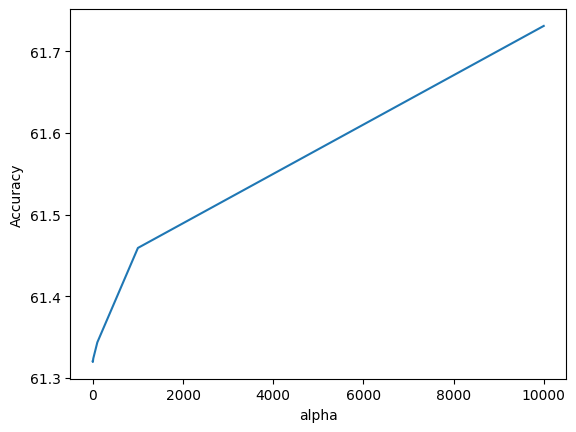

In [39]:
# All the lines of code in this cell were taken from Reference [4].

plt.plot(alpha_values, lap_acc)
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.show()

**Deriving the Top 10 words that predicts each class**

In [40]:
# All the lines of code in this cell were written by me.

# Top 10 words - fresh
sorted_fresh_train = sorted(fresh_word_dict_train.items(), key=lambda x: x[1], reverse=True)
print(f"Top 10 words that predicts 'fresh' class : {dict(sorted_fresh_train[:10])}")

# Top 10 words - rotten
sorted_rotten_train = sorted(rotten_word_dict_train.items(), key=lambda x: x[1], reverse=True)
print(f"Top 10 words that predicts 'rotten' class : {dict(sorted_rotten_train[:10])}")

Top 10 words that predicts 'fresh' class : {'the': 164306, 'a': 118024, 'and': 106701, 'of': 98810, 'to': 63345, 'is': 59743, 'in': 44684, 'its': 39596, 'that': 37455, 'it': 36365}
Top 10 words that predicts 'rotten' class : {'the': 162057, 'a': 106417, 'of': 86394, 'and': 82306, 'to': 72988, 'is': 54240, 'in': 41053, 'it': 38182, 'its': 38035, 'that': 37697}


**Calculating final accuracy on test dataset with optimal hyperparameter (alpha)**

In [41]:
# All the lines of code in this cell were taken from Reference [4].

alpha = 10000
test_pred = predict_alpha(testset, alpha, rotten_word_prob_dict_train, fresh_word_prob_dict_train)

lap_test_accuracy = accuracyscore(testset["Freshness"].to_list(), test_pred)
print(f'Final Accuracy on Test Dataset after applying Laplace smoothing : {lap_test_accuracy} %')

Final Accuracy on Test Dataset after applying Laplace smoothing : 61.932291666666664 %
